#### 다항회기/오버피팅(과대적합)/언더피팅(과소적합) -> p314
- 다항회기(Polynomial Regression): 다차원 다항식으로 두고 회귀 분석을 수행하는 것
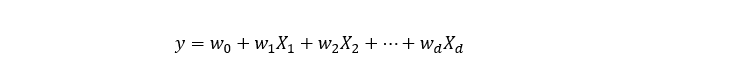


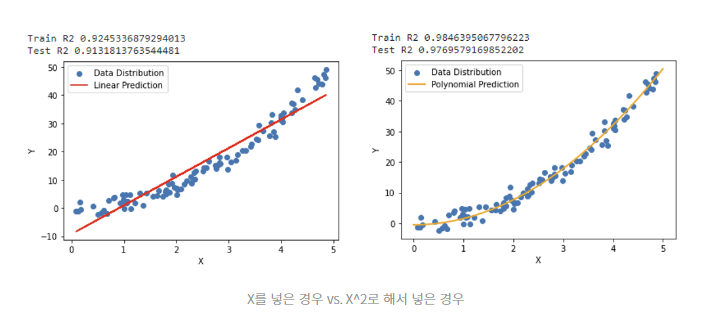

In [45]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 다항식으로 변환한 단항식 생성, [[0, 1],[2, 3]]의 2x2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]


In [46]:
# degree=2 인 2차 다항식으로 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature \n', poly_ftr)

변환된 2차 다항식 계수 feature 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


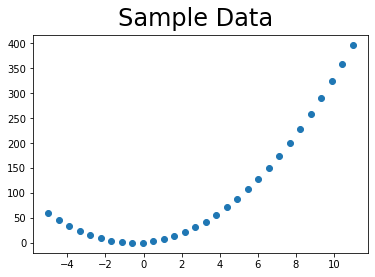

In [47]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 11, 30).reshape(-1, 1)
y = 3*x**2 + 3*x

#noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
#yy = y + noise  # 노이즈 추가

plt.scatter(x, y)
plt.suptitle("Sample Data", size=24)
plt.show()
 


In [101]:
# 다항회기 값 계산
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


model = PolynomialFeatures(degree=2)
x_poly = model.fit_transform(x)

x_poly

array([[ 1.00000000e+00, -5.00000000e+00,  2.50000000e+01],
       [ 1.00000000e+00, -4.44827586e+00,  1.97871581e+01],
       [ 1.00000000e+00, -3.89655172e+00,  1.51831153e+01],
       [ 1.00000000e+00, -3.34482759e+00,  1.11878716e+01],
       [ 1.00000000e+00, -2.79310345e+00,  7.80142687e+00],
       [ 1.00000000e+00, -2.24137931e+00,  5.02378121e+00],
       [ 1.00000000e+00, -1.68965517e+00,  2.85493460e+00],
       [ 1.00000000e+00, -1.13793103e+00,  1.29488704e+00],
       [ 1.00000000e+00, -5.86206897e-01,  3.43638526e-01],
       [ 1.00000000e+00, -3.44827586e-02,  1.18906064e-03],
       [ 1.00000000e+00,  5.17241379e-01,  2.67538644e-01],
       [ 1.00000000e+00,  1.06896552e+00,  1.14268728e+00],
       [ 1.00000000e+00,  1.62068966e+00,  2.62663496e+00],
       [ 1.00000000e+00,  2.17241379e+00,  4.71938169e+00],
       [ 1.00000000e+00,  2.72413793e+00,  7.42092747e+00],
       [ 1.00000000e+00,  3.27586207e+00,  1.07312723e+01],
       [ 1.00000000e+00,  3.82758621e+00

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr=LinearRegression()
lr_poly=LinearRegression()

lr.fit(x, y)
lr_poly.fit(x_poly, y)

print('w1', lr_poly.coef_[0][1])
print('w2', lr_poly.coef_[0][2])
print('b', lr_poly.intercept_[0])

w1 2.9999999999999973
w2 3.0
b 2.842170943040401e-14


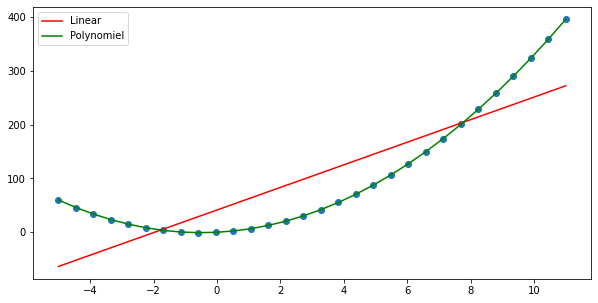

In [103]:
lr_pred = lr.predict(x)
poly_pred=lr_poly.predict(x_poly)

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, lr_pred, color='red', label='Linear')
plt.plot(x, poly_pred, color='green', label='Polynomiel')

plt.legend()
plt.show()

In [104]:
import pandas as pd
import numpy as np

data=np.concatenate((x,y, poly_pred), axis=1)
df=pd.DataFrame(data, columns=['x', 'y', 'poly_pred'])
df.head()

,x,y,poly_pred
0,-5.000000,60.000000,60.000000
1,-4.448276,46.016647,46.016647
2,-3.896552,33.859691,33.859691
3,-3.344828,23.529132,23.529132
4,-2.793103,15.024970,15.024970


In [105]:
print('결정계수:', r2_score(y, poly_pred))
print('상관계수:', r2_score(y, poly_pred))
print('======================================')
print('R2:', r2_score(y, poly_pred))
print('R2:', r2_score(y, lr_pred))
print('===============================')
print('MES:', mean_squared_error(y, poly_pred))
print('MES:', mean_squared_error(y, lr_pred))

결정계수: 1.0
상관계수: 1.0
R2: 1.0
R2: 0.7293533653250519
MES: 8.252162032987236e-28
MES: 3731.862593792283


#### 다중선형회귀 : 릿지(L2)규제, 라쏘(L1)규제, 엘라스틱넷
- 회귀 계수가 기하급수적으로 커지는 것을 제어
- 릿지(L2)규제: 가중치의 값을 최대한 작게 만든다는 것
- 라쏘(L1)규제: 가중치를 0에 가까운 값으로 만드는 것
- 엘라스틱넷: 릿지 회귀와 리쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델

##### 릿지(L2)규제
- 회귀계수(W)의 제곱에 페널티를 부여하는 방식
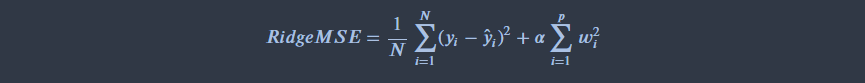

- 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)
-  다중공선성(multicollinearity) 문제를 방지= > 과대적합을 막을수 있음
- 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
- α=0이면 릿지회귀는 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까운 값이 된다.
- α: 사용자가 지정하는 매개변수
- α가 크면 규제의 효과가 커지고, α가 작으면 규제의 효과가 작아짐

- 사용 모듈 연결

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score  # 교차검증

- 임의의 값 생성

In [156]:
# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [157]:
df=pd.DataFrame()
df['X']=X;df['y']=y
df.head(3)

,X,y
0,0.020218,1.081908
1,0.071036,0.870276
2,0.087129,1.143862


In [158]:
X.shape

(30,)

In [159]:
# 개별 degree별로 Polynomial 변환합니다. 
deg=2
poly = PolynomialFeatures(degree=deg, include_bias=False)
lr=LinearRegression()

pipeline = Pipeline([("polynomial_features", poly),
                     ("linear_regression", lr)])

pipeline.fit(X.reshape(-1, 1), y)

# 교차 검증으로 다항 회귀를 평가합니다. 
scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=5)
coefficients = pipeline.named_steps['linear_regression'].coef_

print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(deg, np.round(coefficients),2))
print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(deg , -1*np.mean(scores)))


Degree 2 회귀 계수는 [-7.  6.] 입니다.
Degree 2 MSE 는 0.60 입니다.


Text(0.5, 1.0, 'Degree 1\nMSE = 6.01e-01(+/- 1.04e+00)')

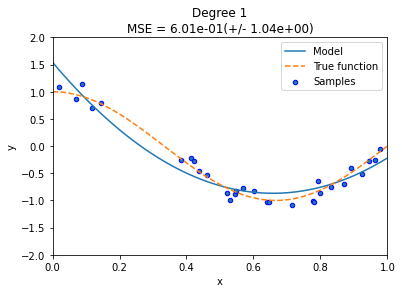

In [160]:
# 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
# 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
X_test = np.linspace(0, 1, 100)

# 예측값 곡선
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 

# 실제 값 곡선
plt.plot(X_test, true_fun(X_test), '--', label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend()
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(1, -scores.mean(), scores.std()))

In [149]:
# 개별 degree별로 Polynomial 변환합니다.
def degree_Poly(deg=1):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    lr=LinearRegression()

    pipeline = Pipeline([("polynomial_features", poly),
                        ("linear_regression", lr)])

    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=5)
    coefficients = pipeline.named_steps['linear_regression'].coef_

    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(deg, np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(deg , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)

    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 

    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(deg, -scores.mean(), scores.std()))
    plt.show()


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 1.00 입니다.


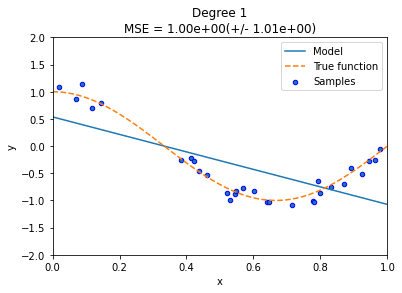


Degree 2 회귀 계수는 [-7.  6.] 입니다.
Degree 2 MSE 는 0.60 입니다.


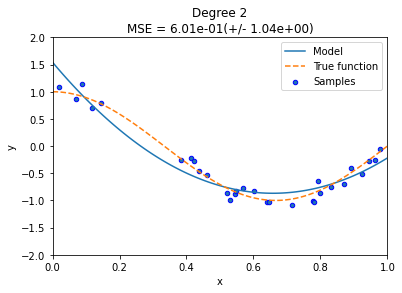


Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 5.75 입니다.


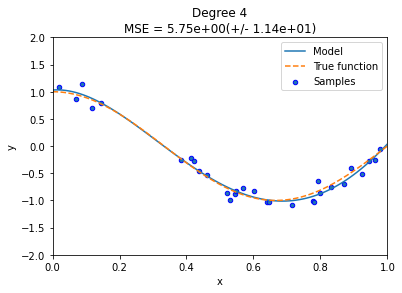


Degree 8 회귀 계수는 [ 2.000e+00 -6.100e+01  3.660e+02 -1.201e+03  2.154e+03 -2.090e+03
  1.028e+03 -1.990e+02] 입니다.
Degree 8 MSE 는 1089818.64 입니다.


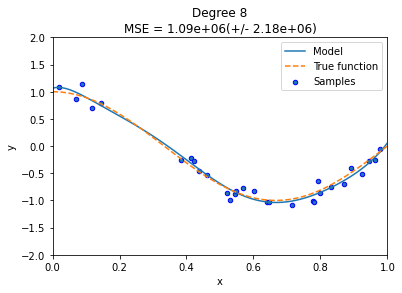


Degree 10 회귀 계수는 [-2.30000e+01  5.39000e+02 -6.36700e+03  3.93180e+04 -1.41827e+05
  3.14871e+05 -4.36173e+05  3.67565e+05 -1.72459e+05  3.45550e+04] 입니다.
Degree 10 MSE 는 139347015.87 입니다.


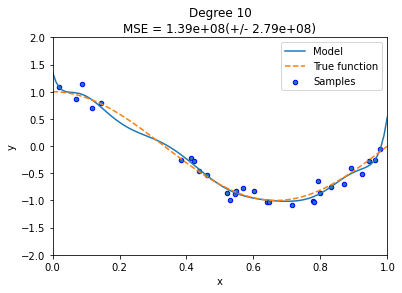


Degree 100 회귀 계수는 [-4.67580000e+04  1.89060300e+06 -4.06474720e+07  5.33544377e+08
 -4.58180431e+09  2.66700273e+10 -1.06416251e+11  2.86231576e+11
 -4.84037461e+11  3.97131286e+11  1.16205454e+11 -4.39307480e+11
 -4.46954922e+10  4.28201506e+11  1.73906272e+11 -3.24059169e+11
 -3.92744468e+11  1.90912564e+10  3.88300444e+11  3.85996824e+11
  4.19257254e+10 -3.51772401e+11 -4.71219185e+11 -2.57449647e+11
  1.29357670e+11  4.28182795e+11  4.95669403e+11  2.87116120e+11
 -4.89079111e+10 -3.65705201e+11 -5.23993464e+11 -4.72938729e+11
 -2.36684734e+11  9.01520185e+10  3.79265057e+11  5.43938400e+11
  5.40126981e+11  3.84766029e+11  1.13710148e+11 -1.81080385e+11
 -4.30849834e+11 -5.70304408e+11 -5.84621124e+11 -4.64799356e+11
 -2.49719591e+11  1.78706188e+10  2.77910844e+11  4.83023310e+11
  6.00258005e+11  6.14651236e+11  5.25318970e+11  3.48004433e+11
  1.21907452e+11 -1.22807819e+11 -3.45317816e+11 -5.16664053e+11
 -6.21180418e+11 -6.37960505e+11 -5.73220149e+11 -4.38314799e+11
 -2.48

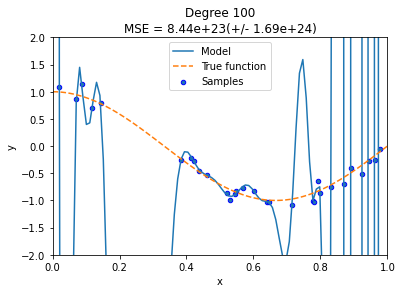

In [161]:
deg=[1, 2, 4, 8, 10, 100]

for i in deg:
    degree_Poly(i)

#### K-fold 교차 검증
- 과적합을 완화하기 위해서 나온 기술
- 특정 데이터에 대해서 과적합이 되는 것을 방지
- 한정된 데이터를 가지고, 더 다양한 데이터를 접하는 것처럼 모델을 학습시킬 경우에도 사용

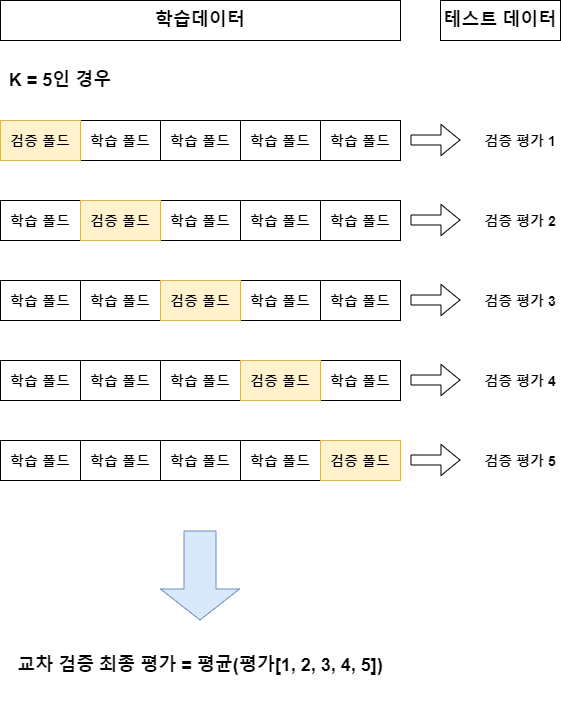

- cross_val_score(estimator, X, y, scoring, cv) 함수
    - estimator : 분류 알고리즘 클래스 혹은 회귀 알고리즘 클래스
    - X : 피처 데이터 세트
    - y : 레이블 데이터 세트 
    - scoring : 예측 성능 평가 지표의 기준
    - cv : 교차 검증 폴드 수 

- 참고: Pipeline
    - 파이프 라인의 목적: cross_validated(교차 검증 가능한) 여러가지의 단계들을 합쳐놓은 것
    - 한 데이터 처리 단계의 출력이 다음 단계의 입력으로 이어지는 형태로 연결된 구조
    - 데이터 사전 처리 및 분류의 모든 단계를 포함하는 단일 개체를 만들 수 있음

In [225]:
# 사이킷런의 패키지로 가상의 데이터를 생성해주는 함수
from sklearn.datasets import make_regression,make_classification

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=100,n_features=10,n_informative=2)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Pipeline 객체 생성
# 매개 변수로 튜플 목록을 사용
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
	])

# 원하는 대로 파이프라인 개체를 사용
# 일반 분류기
pipeline.fit(X_train,y_train)
y_preds = pipeline.predict(X_test)

accuracy_score(y_test,y_preds)

0.7575757575757576

##### 릿지(L2)규제
- 회귀계수(W)의 제곱에 페널티를 부여하는 방식
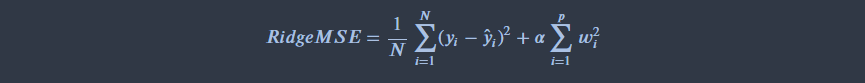

- 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)
-  다중공선성(multicollinearity) 문제를 방지= > 과대적합을 막을수 있음
- 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
- α=0이면 릿지회귀는 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까운 값이 된다.
- α: 사용자가 지정하는 매개변수
- α가 크면 규제의 효과가 커지고, α가 작으면 규제의 효과가 작아짐

- 데이터 생성

In [226]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data') # 농어 정보(길이/높이/너비)
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [227]:
#농어의 무게(target) 생성
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

perch_x=df.to_numpy()

- train/test 나누기

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_x, perch_weight, test_size=0.2, random_state=44)
print(X_train.shape,X_test.shape)

(44, 3) (12, 3)


- 다중선형회기 

In [229]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2, include_bias=False)
#poly.fit_transform([[2,3]])
train_poly=poly.fit_transform(X_train)
test_poly=poly.fit_transform(X_test)

print(train_poly.shape, test_poly.shape)

(44, 9) (12, 9)


- 다중선형회기

In [230]:
# degree=1
poly = PolynomialFeatures(degree=1,
                          include_bias=False)
train_poly=poly.fit_transform(X_train)
test_poly=poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(train_poly, y_train)

# 훈련 데이터를 이용한 정확동
print(lr.score(train_poly, y_train))

# 테스트 데이터를 이용한 정확도
print(lr.score(test_poly, y_test))

0.9405423020971357
0.9474654128377564


In [231]:
# degree=2
poly = PolynomialFeatures(degree=2,
                          include_bias=False)
train_poly=poly.fit_transform(X_train)
test_poly=poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(train_poly, y_train)

# 훈련 데이터를 이용한 정확동
print(lr.score(train_poly, y_train))

# 테스트 데이터를 이용한 정확도
print(lr.score(test_poly, y_test))

0.9902428734788792
0.8795666783066417


- degree=5로 변경후 훈련 진행

In [232]:
# degree=5
poly = PolynomialFeatures(degree=5,
                          include_bias=False)
train_poly=poly.fit_transform(X_train)
test_poly=poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(train_poly, y_train)

# 훈련 데이터를 이용한 정확동
print(lr.score(train_poly, y_train))

# 테스트 데이터를 이용한 정확도
print(lr.score(test_poly, y_test))

0.9999999937447195
-8228972.412118384


- 특성(x)이 적절하게 많다면 모델의 정확도가 높아지지만,반대로 특성의 개수가 과도하게 많아지면 과대적합(Overfitting)이 발생할 수도 있다

- 규제 적용

In [233]:
# 데이터 전처리(정규화=>train 데이터만 진행)
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_poly) # train 데이터만 진행

train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

# 릿지(Ridge) 적용
from sklearn.linear_model import Ridge

rideg=Ridge()
rideg.fit(train_scaled,y_train)

# 훈련 데이터를 이용한 정확도
print(rideg.score(train_scaled, y_train))

# 테스트 데이터를 이용한 정확도
print(rideg.score(test_scaled, y_test))

0.9888618700450424
0.9844965911855029


- alpha라는 매개변수를 통해 이를 조절:  하이퍼 파라미터(Hyper Parameter)
    - alpha을 조정해 최적의 모듈 생성

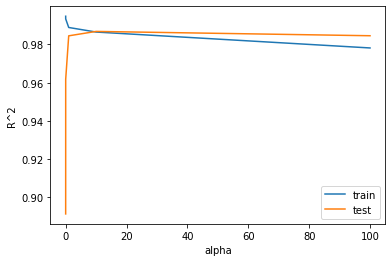

In [234]:
# alpha을 조정해 결과 확인
train_sorce=[]
test_sorce=[]

alpha_lst=[0.001, 0.01, 1, 10, 100]

for alpha in alpha_lst:
    rideg=Ridge(alpha=alpha)  # 릿지 모델 생성
    rideg.fit(train_scaled, y_train) # 릿지 모델 훈련
    
    # 훈련 데이터를 이용한 정확도 리스트에 추가
    train_sorce.append(rideg.score(train_scaled, y_train))

    # 테스트 데이터를 이용한 정확도 리스트에 추가
    test_sorce.append(rideg.score(test_scaled, y_test))

plt.plot(alpha_lst, train_sorce, label='train')
plt.plot(alpha_lst, test_sorce, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()





##### 라쏘(Lass):L1
- 일정 변수들의 계수를 0으로 만들어 사용하지 않도록 하는 방법
-  데이터가 손실되어 정확도가 떨어지는 위험성 있다.

In [235]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(train_scaled, y_train)

# 훈련 데이터를 이용한 정확동
print(lasso.score(train_scaled, y_train))

# 테스트 데이터를 이용한 정확도
print(lasso.score(test_scaled, y_test))

0.9880834789371113
0.984482452310063


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.020e+03, tolerance: 5.385e+02
  model = cd_fast.enet_coordinate_descent(


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.500e+04, tolerance: 5.385e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+04, tolerance: 5.385e+02
  model = cd_fast.enet_coordinate_descent(


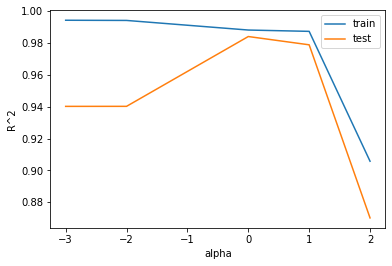

In [236]:
# alpha을 조정해 결과 확인
train_sorce=[]
test_sorce=[]

alpha_lst=[0.001, 0.01, 1, 10, 100]

for alpha in alpha_lst:
    lasso=Lasso(alpha=alpha, max_iter=10000)  # max_iter: 반복 최대 횟수
    lasso.fit(train_scaled, y_train) # 라소 모델 훈련
    
    # 훈련 데이터를 이용한 정확도 리스트에 추가
    train_sorce.append(lasso.score(train_scaled, y_train))

    # 테스트 데이터를 이용한 정확도 리스트에 추가
    test_sorce.append(lasso.score(test_scaled, y_test))

plt.plot(np.log10(alpha_lst), train_sorce, label='train')
plt.plot(np.log10(alpha_lst), test_sorce, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

##### 엘라스틱넷 회귀 (Elastic Net Regression)
- L1 규제와 L2 규제를 결합한 회귀 
- 가중치의 절대값의 합(L1)과 제곱합(L2)을 동시에 제약 조건으로 가지는 모형
- α: 규제의 강도를 조절하는 매개변수
- ρ: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수
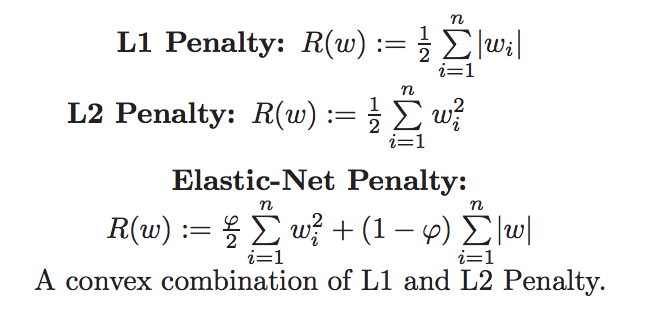

In [240]:
from sklearn.linear_model import Lasso, ElasticNet

ela = ElasticNet(alpha=0.01, l1_ratio = 0.5, max_iter = 100000)
ela.fit(train_scaled, y_train)
print(ela.score(train_scaled, y_train))
print(ela.score(test_scaled, y_test))

0.9900233842655795
0.9836269041061473


#### 회기 적용
- 일반선형회기: 오버피팅이 발생하기 쉬우므로 일반적으로 피하는게 좋음
- 릿지: 오버피팅 방지를 위한 가장 기본적인 규제 모델
- 라쏘: 특성이 여러개이고 그 중 일부 특성만 필요한 경우
- 엘라스틱넷: 특정 수가 훈련샘플 수보다 많거나 특성간 상관관계가 강한 경우